# E89 Deep Learning
# Final Project 
# Classfication of Clothing Items
## by Tanya Zyabkina

This code was used to resize some images that were not the standard size. Standard size images were supplied with the project submission. Credit: https://stackoverflow.com/questions/21517879/python-pil-resize-all-images-in-a-folder

In [205]:
#### DO NOT RUN  ######

from PIL import Image
import os, sys

path = "images\\v_neck/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((480,736), Image.ANTIALIAS)
            imResize.save('images\\resized\\v_neck\\' + item, 'JPEG', quality=80)

resize()

path = "images\\scoop/"
dirs = os.listdir( path )

for item in dirs:
    if os.path.isfile(path+item):
        im = Image.open(path+item)
        f, e = os.path.splitext(path+item)
        imResize = im.resize((480,736), Image.ANTIALIAS)
        imResize.save('images\\resized\\scoop\\' + item, 'JPEG', quality=80)
        
        
path = "images\\crew/"
dirs = os.listdir( path )

for item in dirs:
    if os.path.isfile(path+item):
        im = Image.open(path+item)
        f, e = os.path.splitext(path+item)
        imResize = im.resize((480,736), Image.ANTIALIAS)
        imResize.save('images\\resized\\crew\\' + item, 'JPEG', quality=80)


path = "images\\other/"
dirs = os.listdir( path )

for item in dirs:
    if os.path.isfile(path+item):
        im = Image.open(path+item)
        f, e = os.path.splitext(path+item)
        imResize = im.resize((480,736), Image.ANTIALIAS)
        imResize.save('images\\resized\\other\\' + item, 'JPEG', quality=80)


### Image pre-processing
Import images, crop them to 260x260, add labels, randomize images to for validation sort.

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
import numpy as np


mypath='images\\resized\\crew/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images[n] = cv2.imread( join(mypath,onlyfiles[n]) )



In [2]:
y = 50
x = 110
h = 260
w = 260

cropped = np.empty((len(images), 2), dtype=object)

#cropped = np.empty(images.shape,)
for i in range(0,len(images)):
    cropped[i] = (images[i][y:y+h, x:x+w], 'crew')

In [3]:
cropped.shape

(298, 2)

In [4]:
mypath='images\\resized\\scoop/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
scoop = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    scoop[n] = cv2.imread( join(mypath,onlyfiles[n]) )

mypath='images\\resized\\other/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
other = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    other[n] = cv2.imread( join(mypath,onlyfiles[n]) )

mypath='images\\resized\\v_neck/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
v_neck = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    v_neck[n] = cv2.imread( join(mypath,onlyfiles[n]) )

In [5]:
print(scoop.shape, other.shape, v_neck.shape)

(290,) (406,) (306,)


Sample image before cropping

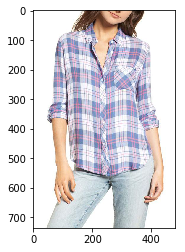

In [50]:
plt.imshow(cv2.cvtColor(other[52], cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
scoop_crop = np.empty((len(scoop), 2), dtype=object)
for i in range(0,len(scoop)):
    scoop_crop[i] = (scoop[i][y:y+h, x:x+w], 'scoop')
    
other_crop = np.empty((len(other), 2), dtype=object)
for i in range(0,len(other)):
    other_crop[i] = (other[i][y:y+h, x:x+w], 'other')
    
v_neck_crop = np.empty((len(v_neck), 2), dtype=object)
for i in range(0,len(v_neck)):
    v_neck_crop[i] = (v_neck[i][y:y+h, x:x+w], 'v_neck')

In [8]:
print(scoop_crop.shape, other_crop.shape, v_neck_crop.shape)

(290, 2) (406, 2) (306, 2)


Sample image after cropping.

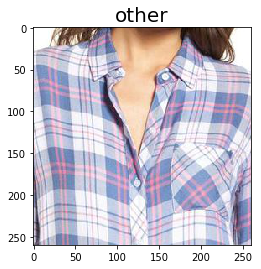

In [51]:
record_to_plot = 52
plt.imshow(cv2.cvtColor(other_crop[record_to_plot,0], cv2.COLOR_BGR2RGB))
plt.title(other_crop[record_to_plot,1], fontsize = 20)
plt.show()


Code to produce image layout. Credit: https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1

The code was modified, and it runs out of resources often. 

In [10]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        a.set_title(title, fontsize = 70)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

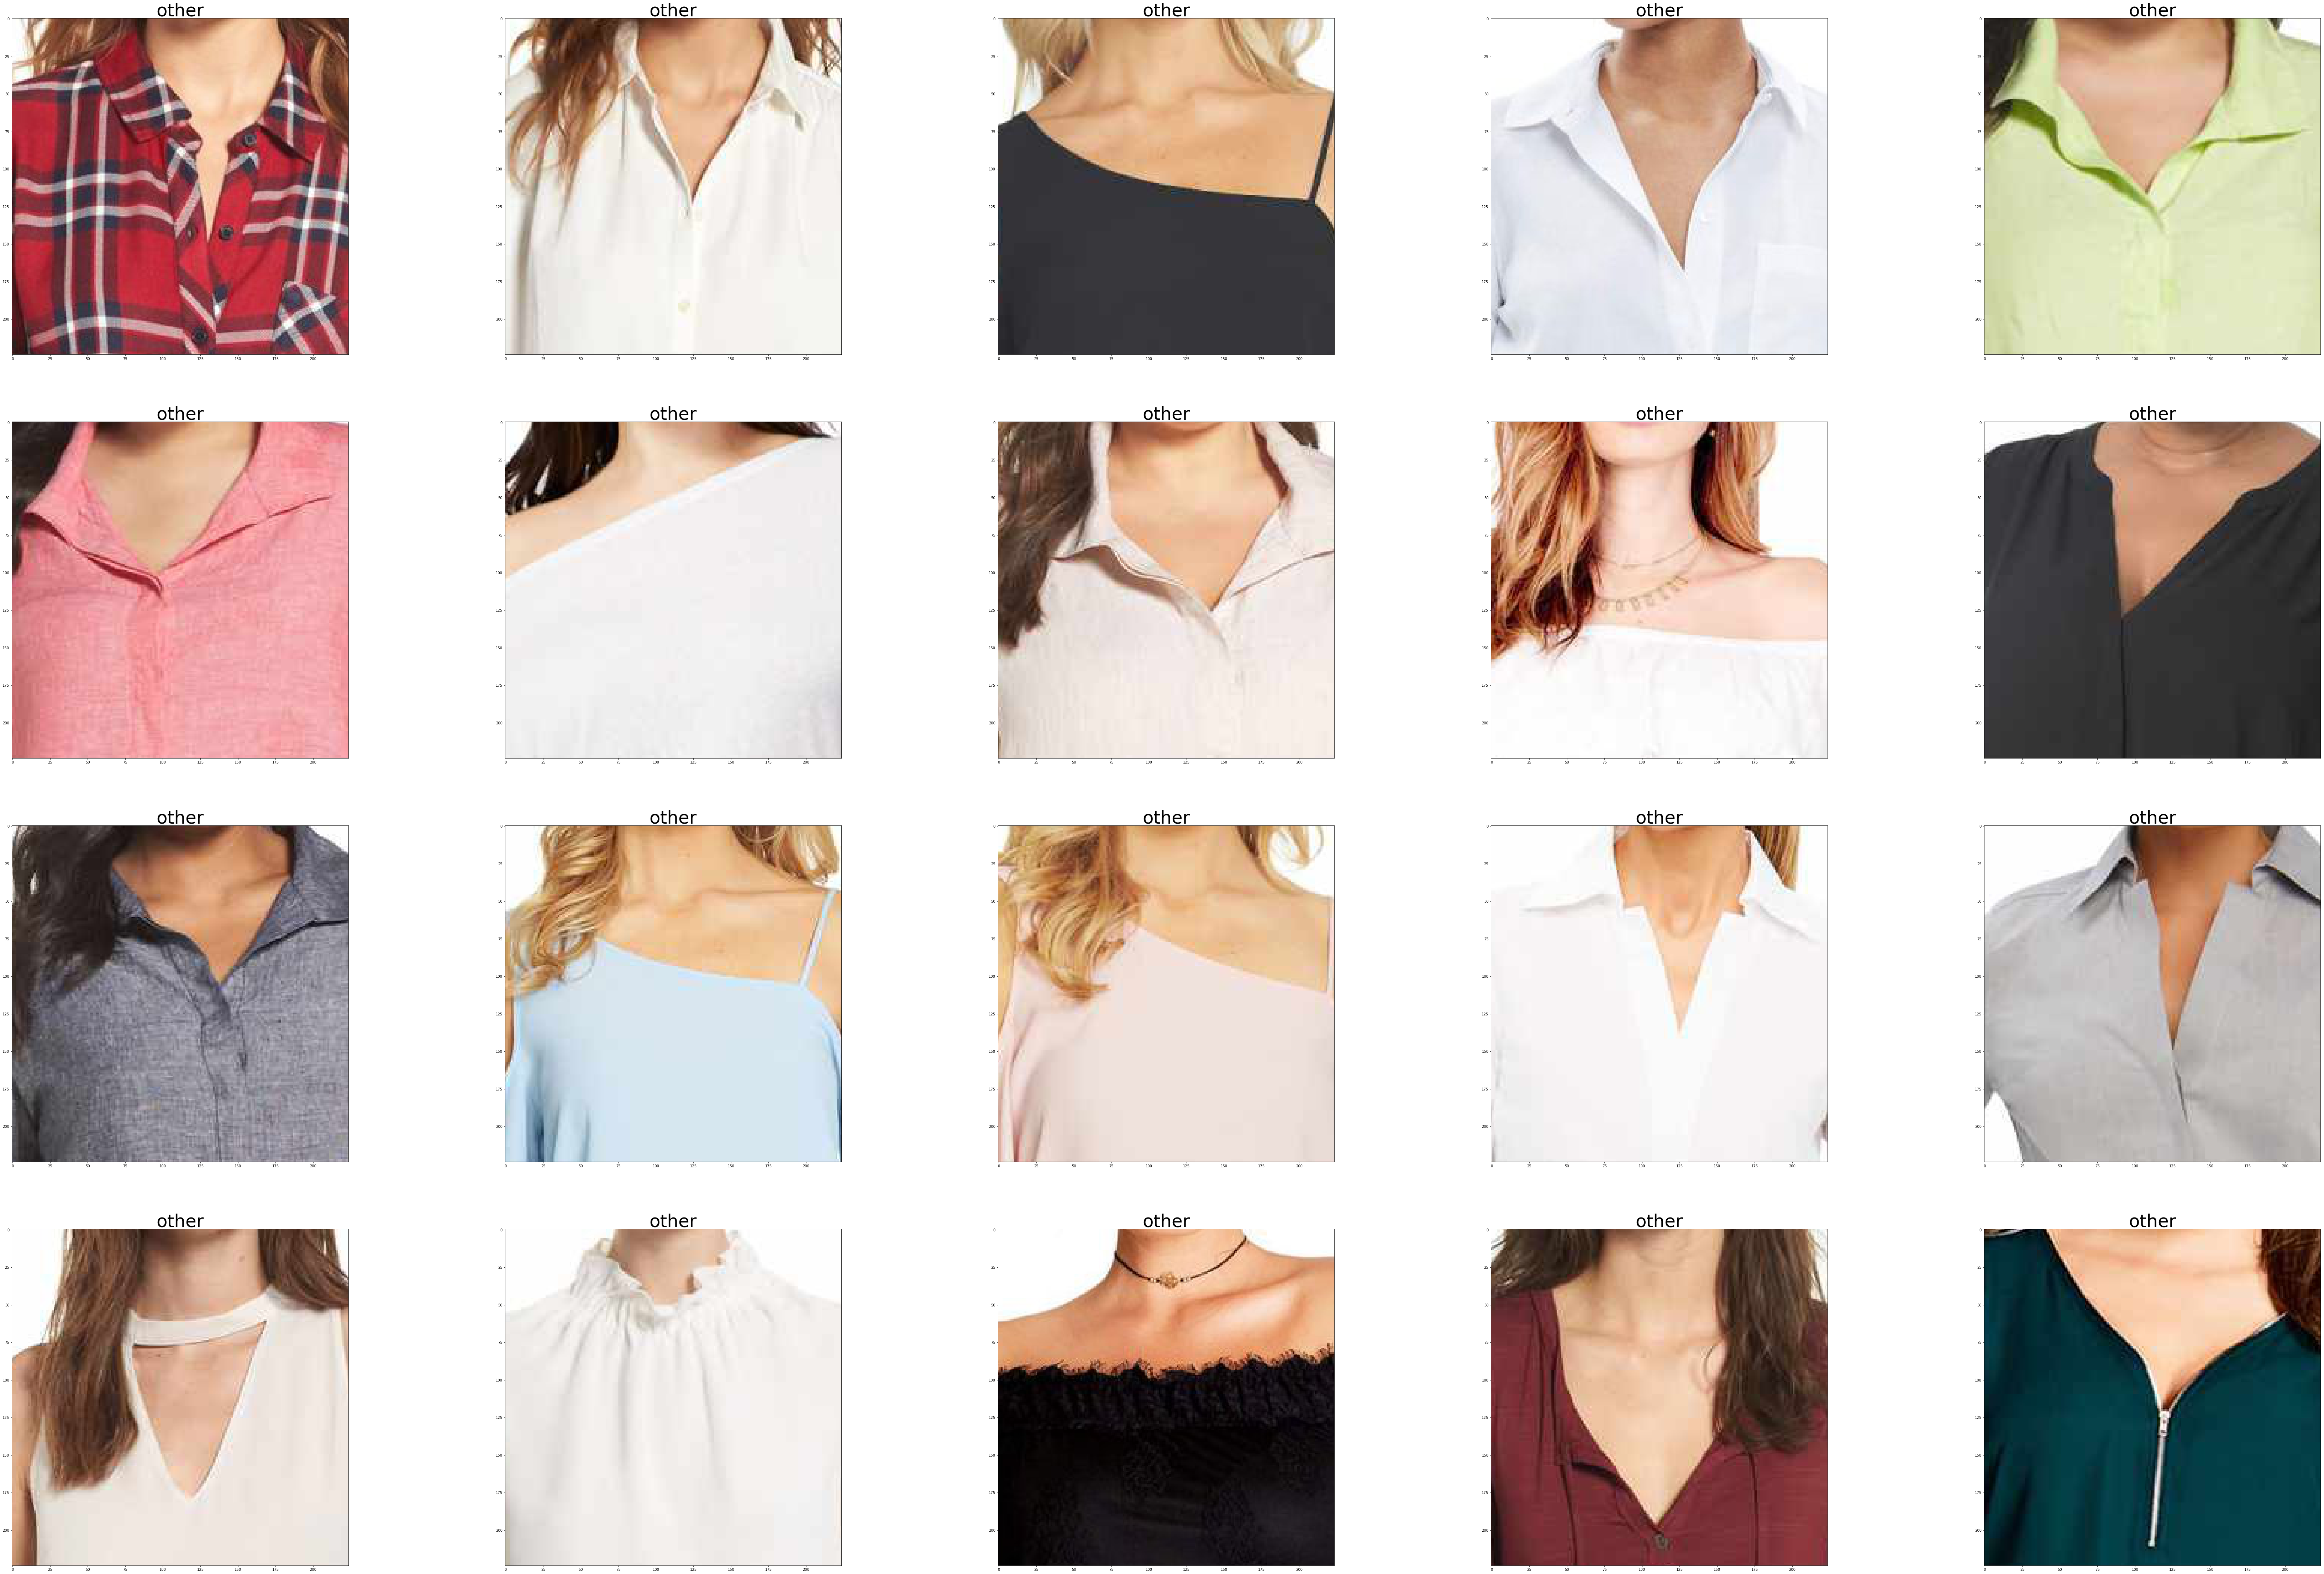

In [231]:
show_images(other_crop[0:20,0], cols = 4, titles = other_crop[0:20,1])

In [11]:
cropped = np.append(cropped, scoop_crop, axis = 0)
cropped = np.append(cropped, other_crop, axis = 0)
cropped = np.append(cropped, v_neck_crop, axis = 0)
cropped.shape

(1300, 2)

In [13]:
#drop everything not needed
images = None
scoop_crop = None
other_crop = None
v_neck_crop = None

In [12]:
np.random.shuffle(cropped)

Display images from the full set.

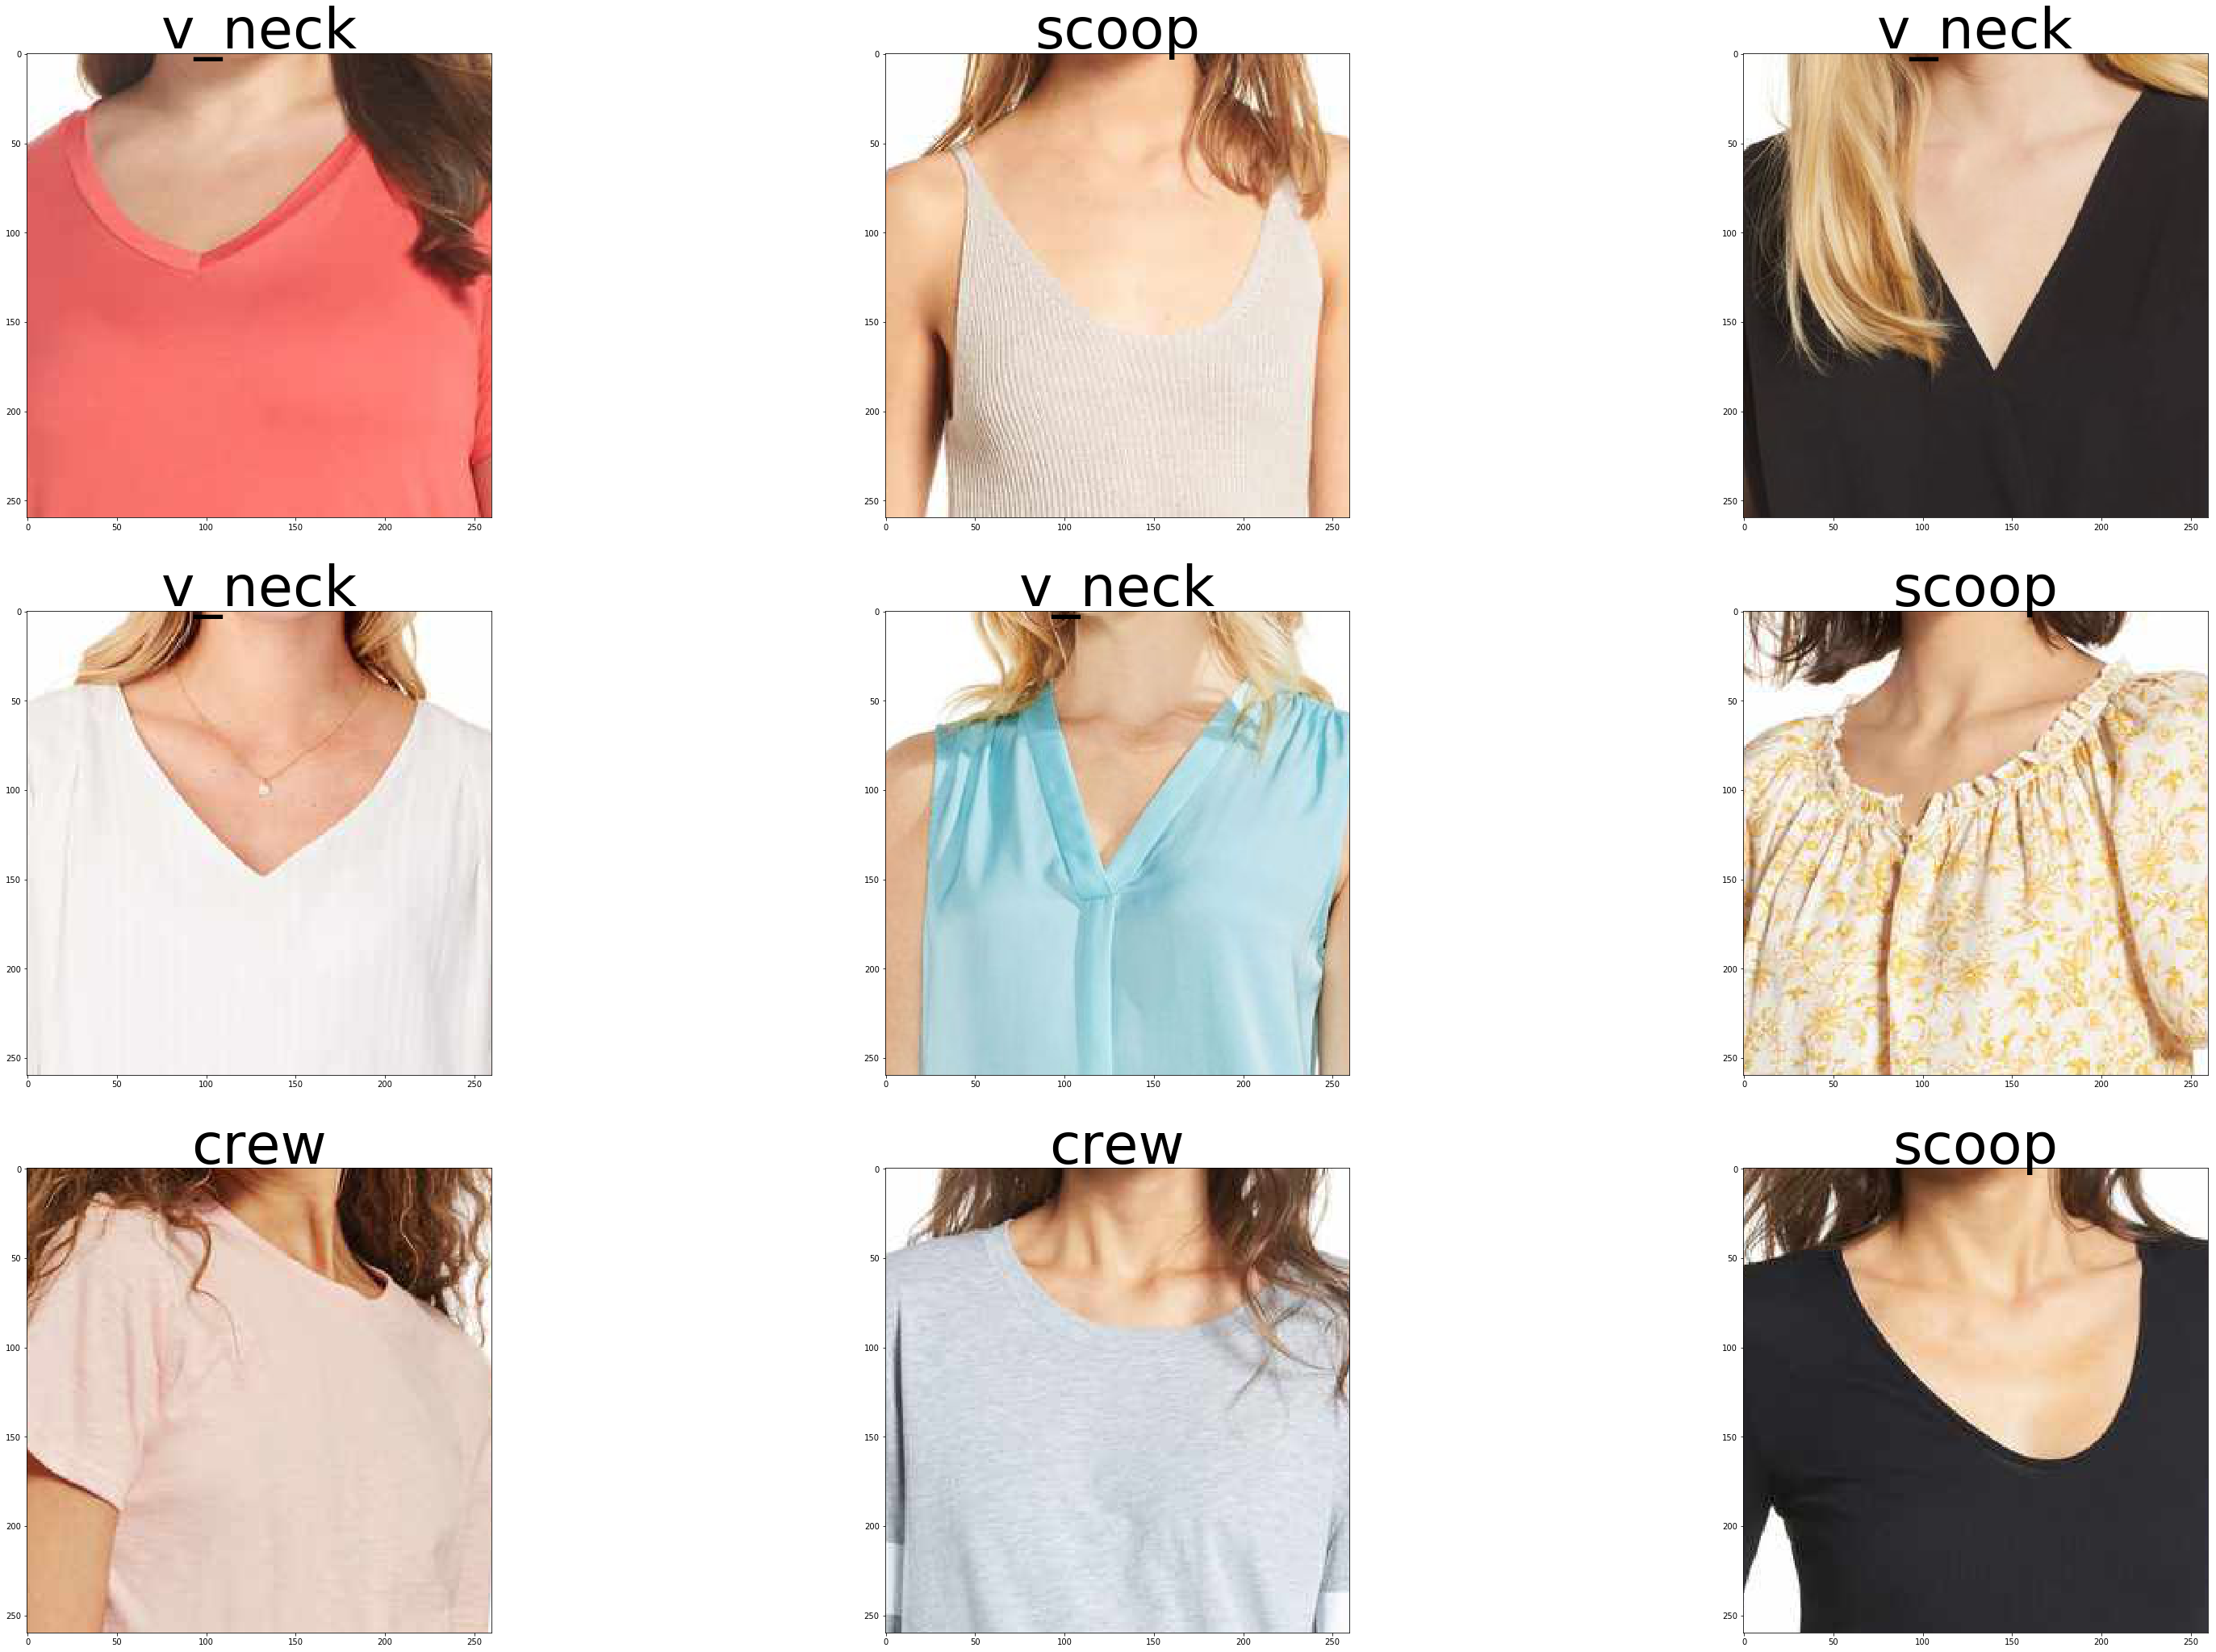

In [52]:
show_images(cropped[300:309,0], cols = 3, titles = cropped[300:309,1])

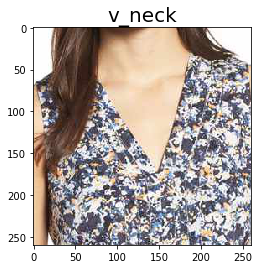

In [14]:
record_to_plot = 562
plt.imshow(cv2.cvtColor(cropped[record_to_plot,0], cv2.COLOR_BGR2RGB))
plt.title(cropped[record_to_plot,1], fontsize = 20)
plt.show()

### Model input prep
Split validation group, convert classes to dummy variables.

In [13]:
x_val = np.stack(cropped[:260,0])
x_train = np.stack(cropped[260:1300,0])

val_labels = np.stack(cropped[:260,1]).astype(str)
train_labels = np.stack(cropped[260:1300,1]).astype(str)

In [14]:
import pandas as pd
y_val_pd = pd.get_dummies(val_labels)
y_train_pd = pd.get_dummies(train_labels)

In [15]:
y_val = y_val_pd.as_matrix()
y_train = y_train_pd.as_matrix()

In [16]:
y_train.shape

(1040, 4)

### Model setup

In [17]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(h, w, 3))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

After a few experiments I decided to leave the VGG weights alone.

In [19]:
conv_base.trainable = False

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [21]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 260, 260, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 260, 260, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 260, 260, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 130, 130, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 130, 130, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 130, 130, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 65, 65, 128)       0         
__________

In [22]:
conv_base.trainable_weights

[]

In [23]:
model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(32768, 64) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(64, 4) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(4,) dtype=float32_ref>]

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2097216   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 16,812,164
Trainable params: 2,097,476
Non-trainable params: 14,714,688
_________________________________________________________________


### Data batches generator and model training
I used data augmentation capability in Keras to produce an enhanced set of images and compensate for the small sample size.
The model results were somewhat inconsistent from run to run, and validation accuracy tended to wobble back and forth. This was likely due to the small size of the validation sample (260 observations).

In [68]:
y_train.dtype

dtype('uint8')

In [25]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train, y_train)

validation_generator = test_datagen.flow(x_val, y_val)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=52,
      epochs=8,
      validation_data=validation_generator, validation_steps=13)

Epoch 1/8
52/52 [==============================] - 101s 2s/step - loss: 1.4200 - acc: 0.2716 - val_loss: 1.3597 - val_acc: 0.3144
Epoch 2/8
52/52 [==============================] - 92s 2s/step - loss: 1.3360 - acc: 0.3696 - val_loss: 1.1226 - val_acc: 0.4845
Epoch 3/8
52/52 [==============================] - 91s 2s/step - loss: 1.0789 - acc: 0.5673 - val_loss: 0.7285 - val_acc: 0.7062
Epoch 4/8
52/52 [==============================] - 92s 2s/step - loss: 0.8066 - acc: 0.6965 - val_loss: 0.7581 - val_acc: 0.7397
Epoch 5/8
52/52 [==============================] - 91s 2s/step - loss: 0.7047 - acc: 0.7488 - val_loss: 0.5397 - val_acc: 0.7912
Epoch 6/8
52/52 [==============================] - 92s 2s/step - loss: 0.6085 - acc: 0.7951 - val_loss: 0.6491 - val_acc: 0.7835
Epoch 7/8
52/52 [==============================] - 91s 2s/step - loss: 0.5418 - acc: 0.8221 - val_loss: 0.4797 - val_acc: 0.8402
Epoch 8/8
52/52 [==============================] - 91s 2s/step - loss: 0.4849 - acc: 0.8281 - va

The model file is 100Mb+ so I will not include into the submission. 

In [29]:
model.save('neckline_4cat_5.h5')

Making predicitions and comparing to the truth table.

Predicted Scores
   crew  other  scoop  v_neck
0   0.0    0.0    1.0     0.0


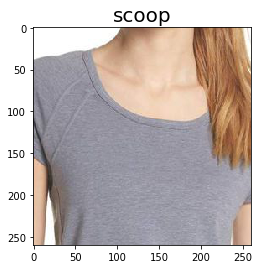

In [56]:
record_to_plot = 220  # << number between 0 and 260

pred = pd.DataFrame(np.around(model.predict(x_val[record_to_plot:record_to_plot+1]),2), 
                       columns=['crew', 'other', 'scoop', 'v_neck'])
print('Predicted Scores')
print(pred)

plt.imshow(cv2.cvtColor(cropped[record_to_plot,0], cv2.COLOR_BGR2RGB))
plt.title(cropped[record_to_plot,1], fontsize = 20)
plt.show()

In [48]:
np.around(model.predict(x_val[130:140]),2)

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [49]:
y_val_pd[130:140]

crew  other  scoop  v_neck
130     0      0      1       0
131     0      0      1       0
132     0      0      0       1
133     0      0      1       0
134     0      0      1       0
135     0      1      0       0
136     1      0      0       0
137     0      1      0       0
138     0      1      0       0
139     0      0      1       0

Producing the images that were classifed as v-neck.

In [51]:
predicton = np.around(model.predict(x_val),2)

In [52]:
predicton.shape

(260, 4)

In [53]:
results  = np.append(cropped[:260],predicton, axis = 1)

In [54]:
results.shape

(260, 6)

In [55]:
pred_v_neck = results[results[:,5]>0.9]

In [56]:
pred_v_neck.shape

(57, 6)

In [49]:
show_images(pred_v_neck[0:20,0], cols = 4, titles = pred_v_neck[0:20,1])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


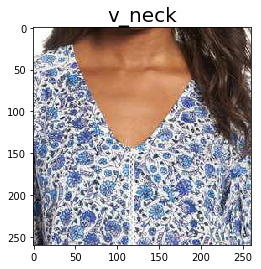

In [60]:
record_to_plot = 25
plt.imshow(cv2.cvtColor(pred_v_neck[record_to_plot,0], cv2.COLOR_BGR2RGB))
plt.title(pred_v_neck[record_to_plot,1], fontsize = 20)
plt.show()

In [58]:
pred_v_neck[:,1]

array(['v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck',
       'v_neck', 'v_neck', 'other', 'v_neck', 'v_neck', 'other', 'v_neck',
       'v_neck', 'other', 'v_neck', 'v_neck', 'v_neck', 'v_neck',
       'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck',
       'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck',
       'other', 'v_neck', 'other', 'v_neck', 'v_neck', 'v_neck', 'v_neck',
       'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck',
       'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck', 'v_neck',
       'v_neck', 'other', 'v_neck', 'other', 'v_neck', 'v_neck', 'v_neck'],
      dtype=object)

In [48]:
pred_pd = pd.DataFrame(results[:, 1:], columns=['class', 'crew', 'other', 'scoop', 'v_neck'])

pred_pd.to_csv('output.csv')


In [53]:
import sys
print(sys.version)

3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
